In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.duplicated().sum()
#df = df.drop_duplicates()

0

<AxesSubplot:xlabel='Outcome', ylabel='count'>

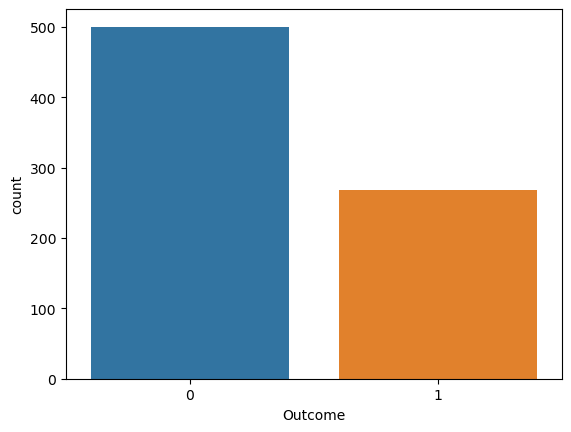

In [5]:
sns.countplot(x ='Outcome' , data = df)

In [6]:
y = df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
x = df.drop('Outcome' , axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state =0)

## Knn Model

In [9]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : list(range(1,25)),
    'p': [1,2],
    'weights' : ['uniform' , 'distance']
}
grid_search = GridSearchCV(knn , params , cv = 5)
grid_search.fit(x_train , y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
0.7394242303078769


In [10]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
0.7394242303078769


In [11]:
knn = KNeighborsClassifier(n_neighbors = 18, p = 1, weights = 'distance')
knn.fit(x_train , y_train)
knn_pred = knn.predict(x_test)
train_knn_pred = knn.predict(x_train)
print("Testing Classification Report")
print(classification_report(y_test , knn_pred))
print("Training Classification Report")
print(classification_report(y_train , train_knn_pred))

Testing Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



## Naive bayes Model

In [12]:
NB_model = GaussianNB()
params = {
    'var_smoothing' : np.logspace(0, -2 , num = 100)
}
grid_search = GridSearchCV(NB_model, params , cv = 5)
grid_search.fit(x_train , y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'var_smoothing': 0.011497569953977356}
0.7442889510862322


In [13]:
NB_model = GaussianNB(var_smoothing = 0.011497569953977356)
NB_model.fit(x_train , y_train)
NB_pred = NB_model.predict(x_test)
train_NB_model_pred = NB_model.predict(x_train)
print("Testing Classification Report")
print(classification_report(y_test , NB_pred))
print("Training Classification Report")
print(classification_report(y_train , train_NB_model_pred))

Testing Classification Report
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       107
           1       0.68      0.45      0.54        47

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.75      0.77      0.75       154

Training Classification Report
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       393
           1       0.74      0.49      0.59       221

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.71       614
weighted avg       0.75      0.76      0.74       614



## SVM Model

In [14]:
SVC_Model = SVC()
params = {
    'kernel' : ['linear', 'rbf', 'poly'],
    'C' : [1.0, 0.1, 0.01],
    'gamma' :['scale']
}
grid_search = GridSearchCV(SVC_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.759016393442623


In [15]:
SVC_Model = SVC(C = 1.0, gamma = 'scale', kernel = 'linear')
SVC_Model.fit(x_train , y_train)
SVC_pred = SVC_Model.predict(x_test)
train_SVC_Model_pred = SVC_Model.predict(x_train)
print("Testing Classification Report")
print(classification_report(y_test , SVC_pred))
print("Training Classification Report")
print(classification_report(y_train , train_SVC_Model_pred))

Testing Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Training Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       393
           1       0.72      0.57      0.64       221

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## Decision Tree Model

In [16]:
DT_Model = DecisionTreeClassifier()
params = {
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40],
    'criterion' : ['gini','entropy']
}
grid_search = GridSearchCV(DT_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}
0.7393975743036119


In [17]:
DT_Model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)
DT_Model.fit(x_train , y_train)
DT_pred = DT_Model.predict(x_test)
train_DT_Model_pred = DT_Model.predict(x_train)
print("Testing Classification Report")
print(classification_report(y_test , DT_pred))
print("Training Classification Report")
print(classification_report(y_train , train_DT_Model_pred))

Testing Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

Training Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       393
           1       0.71      0.68      0.70       221

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.78      0.79      0.78       614



## Logistic Regression Model 

In [18]:
import warnings
warnings.filterwarnings("ignore")
LG_Model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C' : [1.0, 0.1, 0.01, 0.001],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid_search = GridSearchCV(LG_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7655337864854058


In [19]:
LG_Model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs')
LG_Model.fit(x_train , y_train)
LG_pred = LG_Model.predict(x_test)
train_LG_Model_pred = LG_Model.predict(x_train)
print("Testing Classification Report")
print(classification_report(y_test , LG_pred))
print("Training Classification Report")
print(classification_report(y_train , train_LG_Model_pred))

Testing Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Training Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       393
           1       0.72      0.58      0.64       221

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## Random Forest Classification Model

In [24]:
rndomf_Model = RandomForestClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : ['sqrt', 'log2']
}
    
grid_search = GridSearchCV(rndomf_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}
0.7622417699586832


In [26]:
rndomf_Model = RandomForestClassifier(criterion = 'gini', max_depth = 15, max_features = 'sqrt', n_estimators = 50)
rndomf_Model.fit(x_train , y_train)
rf_pred = rndomf_Model.predict(x_test)
train_rl_Model_pred = rndomf_Model.predict(x_train)
print("Testing Classification Report RandomForestClassification")
print(classification_report(y_test , rf_pred))
print("Training Classification Report RandomForestClassification")
print(classification_report(y_train , train_rl_Model_pred))

Testing Classification Report RandomForestClassification
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       107
           1       0.67      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.81      0.81      0.81       154

Training Classification Report RandomForestClassification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [27]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## feature selection

In [28]:
# feature selection 
RF_model = RandomForestClassifier()
RF_model.fit(x_train , y_train)

RandomForestClassifier()

In [29]:
feature_scores = pd.Series(RF_model.feature_importances_,
                           index = x_train.columns).sort_values(ascending = False)

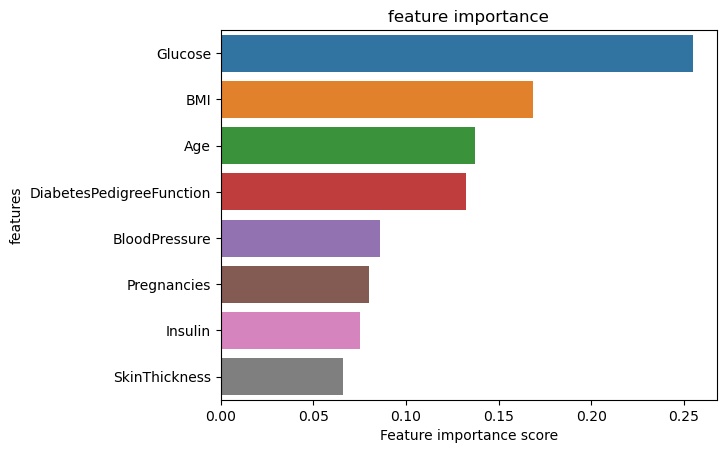

In [30]:
sns.barplot(x = feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")
plt.ylabel("features")
plt.title("feature importance")
plt.show()

In [31]:
y = df['Outcome']
x = df.drop(columns = ['Outcome','SkinThickness'])
x.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [34]:
rndomf_Model = RandomForestClassifier()
rndomf_Model.fit(x_train , y_train)
rf_pred = rndomf_Model.predict(x_test)
train_rl_Model_pred = rndomf_Model.predict(x_train)
print("Testing Classification Report RandomForestClassification")
print(classification_report(y_test , rf_pred))
print("Training Classification Report RandomForestClassification")
print(classification_report(y_train , train_rl_Model_pred))

Testing Classification Report RandomForestClassification
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

Training Classification Report RandomForestClassification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



## Example 2

In [49]:
df = pd.read_csv("RF_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
df.duplicated().sum()

0

In [52]:
df.drop(['id', 'Unnamed: 32'], axis = 1 , inplace = True)

In [53]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [55]:
x = df.drop('diagnosis' , axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

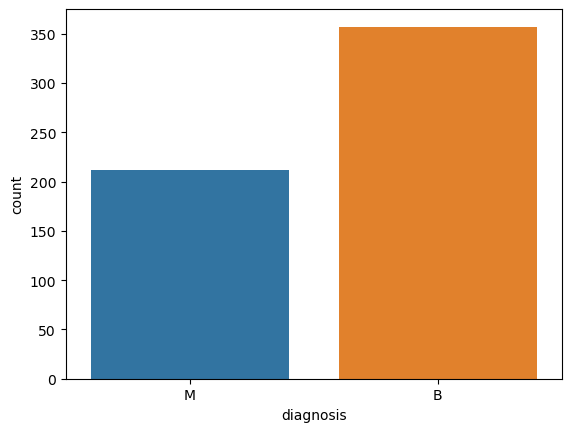

In [57]:
sns.countplot(x ='diagnosis' , data = df)

In [58]:
M = df[df.diagnosis == 'M']
B = df[df.diagnosis == 'B']

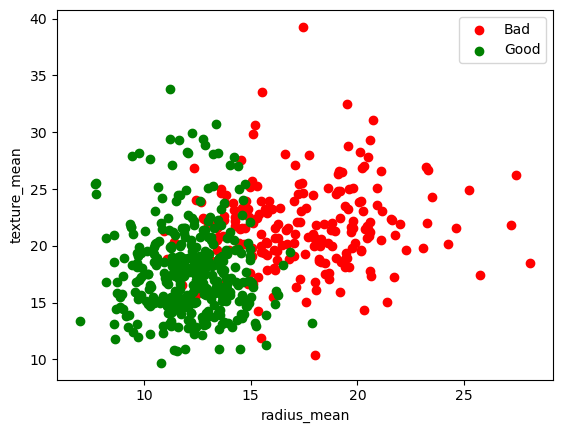

In [63]:
plt.scatter(M.radius_mean, M.texture_mean, color = 'red', label = 'Bad')
plt.scatter(B.radius_mean, B.texture_mean, color = 'green', label = 'Good')
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [64]:
rndomf_Model = RandomForestClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : ['sqrt', 'log2']
}
    
grid_search = GridSearchCV(rndomf_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
0.9670329670329669


In [65]:
rndomf_Model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', n_estimators = 100)
rndomf_Model.fit(x_train , y_train)
rf_pred = rndomf_Model.predict(x_test)
train_rl_Model_pred = rndomf_Model.predict(x_train)
print("Testing Classification Report RandomForestClassification")
print(classification_report(y_test , rf_pred))
print("Training Classification Report RandomForestClassification")
print(classification_report(y_train , train_rl_Model_pred))

Testing Classification Report RandomForestClassification
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Classification Report RandomForestClassification
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



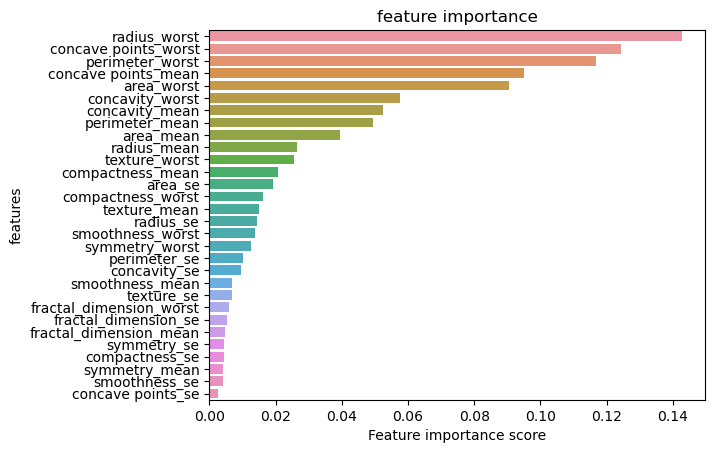

In [66]:
# feature selection 
RF_model = RandomForestClassifier()
RF_model.fit(x_train , y_train)
feature_scores = pd.Series(RF_model.feature_importances_,
                           index = x_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")
plt.ylabel("features")
plt.title("feature importance")
plt.show()